<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Tree-Algorithm/machine_learning_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **랜덤 포레스트, 그레이디언트 부스팅**

시작하기 전에...
1. 지금까지 공부: k-최근접 이웃, 선형 회귀, 릿지, 라쏘, 다향 회귀 로지스틱 회귀,
확률적 경사하강법, 분류기, 결정 트리 모델, 교차 검증, 하이퍼파라미터 튜닝
2. 베스트 머신러닝은 무엇? <font color="#ff0000">결정 트리를 확장</font>하여 머신러닝 계를 제패한 알고리즘은?
3. 결정 트리? 나무 말고 숲을 봐라!
4. 머신러닝, 나무, 숲 -> <font color="#ff0000">랜덤 포레스트</font>(Random Forest)
5. 보편적으로 성능이 좋아 널리 사용되는 알고리즘 있지만, 문제마다 다를 수 있음
-> 어떤 알고리즘이 더 뛰어나다고 미리 판단하지 말고, 다 테스트 필요!			        		

# **정형 데이터**
- 생선의 길이, 높이, 무게, 대각선 / 와인 데이터 등을 데이터로 사용 
- <font color= #0080ff>행/열이 명확</font>
- <font color= #0080ff>structured data</font>
- csv, DB, Excel 등에 저장 용이

# **비정형 데이터**
- 데이터베이서나 엑셀처럼 <font color= #0080ff>행/열로 표현하기 어려운</font> 데이터
- 글과 같은 텍스트 데이터, 디카로 찍은 사진, 디지털 음악 등
- NoSQL은 엑셀이나 csv에 담기 어려운 <font color= #0080ff>텍스트, 이미지, 음악 or <font color= #0080ff>JSON</font> 데이터 저장

# **정형/비정형데이터**
- 지금까지 배운 <font color= #0080ff>머신러닝 알고리즘은 정형 데이터</font>에 잘 맞음
-  그 중에서도 가장 뛰어난 성과를 내는 알고리즘
  - <font color= #0080ff>앙상블 학습</font>(ensemble learning)
  - 앙상블 학습은 대부분 결정 트리를 기반


  
- <font color= #0080ff>비정형 데이터</font>: 신경망 알고리즘에 사용 (<font color= #0080ff>딥러닝</font>)
  - 머신러닝 방법으로는 모델을 만들기 까다로움
  - 사진을 인식하고 텍스트를 이해하는 등이 가능			        		

# **랜덤 포레스트** (Random Forest)
- 앙상블 학습의 대표 주자 중 하나
- <font color= #0080ff>안정적인 성능 덕에 널리 사용</font> (가장 먼저 시도 권유)
- 결정 트리를 랜덤하게 만들어 <font color= #0080ff>결정 트리(나무)의 숲</font>을 생성
- 각 결정 트리의 예측을 사용해 최종 예측 결정

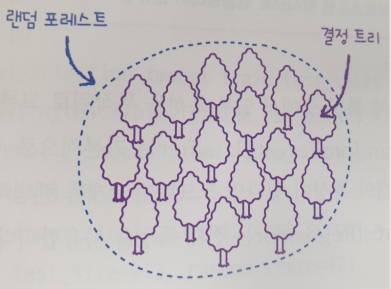

# **부트스트랩샘플**
- 각 트리를 훈련하기 위한 데이터를 <font color= #0080ff>랜덤하게</font> 샘플 추출 -> <font color= #0080ff>중복 가능</font>!
예) 1,000개 가방에서 1,000개씩 샘플을 뽑을 때, 1개 뽑고,
뽑았던 1개를 <font color= #0080ff>다시 가방에 넣음</font> ->중복된 샘플 뽑을 수 있음
- 이렇게 만든 샘플: <font color= #ff0000>부트스트랩 샘플</font> (bootstrap sample)
-  훈련 세트 크기와 같음: 1,000개 가방에서 <font color= #0080ff>중복하여</font> 1,000개 샘플

> <font color= #ff0000>부트스트랩 방식</font>: 데이터 세트에서 중복을 허용하여 데이터를 샘플링하는 방식

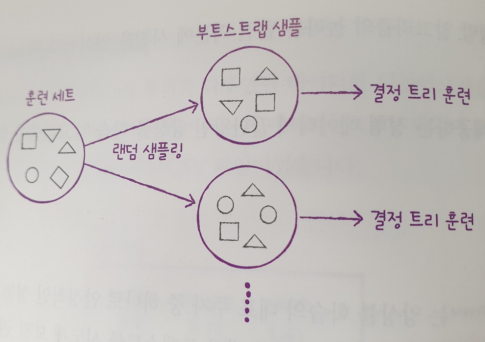

# 랜덤 포레스트
- 각 노드 분할 시 / <font color= #0080ff>전체 특성 중 일부 특성을 무작위로</font> 고른 다음 / 이 중에서 최선의 분할을 찾음
- 4개의 특성이 있다면 <font color= #0080ff>노드마다 2개를 랜덤</font>하게 선택

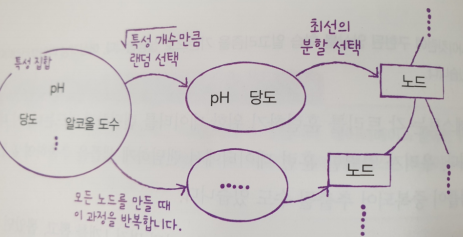

- <font color= #0080ff>default 100개 트리</font> 사용 (보통 120 ~ 200)
- 각 트리의 클래스별 확률 평균해서 <font color= #0080ff>가장 높은 확률 클래스</font>로 결정!
- 랜덤하게 샘플과 특성을 사용   
  👉 <font color= #ff0000>과대적합 막아주고 + 검증/테스트 세트에서 안정적 성능</font>
- 기본 매개변수 설정만으로도 어느 정도 좋은 결과!

In [1]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/와인/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
import numpy as np
import pandas as pd
from sklearn. model_selection import train_test_split

wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/와인/wine.csv')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


#**교차 검증 수행**

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print (np.mean(scores [ 'train_score']), np.mean(scores ['test_score']))

0.9973541965122431 0.8905151032797809


> 검증 점수 / 훈련 세트 점수 모두 반환

> 결국은 훈련 세트에 다소 과대적합

#**특성 중요도**

매개변수: 결정 트리의 앙상블이므로 모두 제공
  - criterion, max_depth, max_features, mi_samples_split,min_impurity_decrease, min_samples_leaf 등

<font color= #0080ff>특성 중요도</font>
  : 결정 트리의 특성 중요도 취합! 큰 장점 중 하나

In [4]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


- 오히려 당도 중요도 감소
- <font color= #ff0000>알코올 도수와 pH 특성 중요도 상승</font>
- 랜덤 포레스트가 특성의 일부를 랜덤하게 선택
- <font color= #ff0000>과대적합을 줄이고 일반화 성능을 높임!</font>

#**00B(out of bag) 샘플**

중복 허용 → 부트스트랩 샘플에 포함되지 않고 남는 샘플    
→ <font color= #0080ff>검증 세트</font> 열할

- 부트스트랩 샘플로 훈련한 결정 트리 평가
- <font color= #0080ff>oob_score</font> 매개변수를 <font color= #0080ff>True</font>로 지정   
  : 각 결정 트리의 OOB 점수를 평균하여 출력

In [6]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1,
                            random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


> OOB 점수를 활용하면 교차 검증을 대신   
👉 <font color= #ff0000>훈련 세트에 더 많은 샘플 사용</font>

# **랜덤 포레스트(Random Forest)**
<font color= #0080ff>n_estimators</font> 매개변수: 트리개수 지정   
- <font color= #0080ff>클수록 좋음</font>: 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적 모델
- 많은 메모리와 긴 훈련 시간

In [7]:
rf = RandomForestClassifier(oob_score=True, n_estimators=3000,
                            random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


- 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않음

# **엑스트라 트리(Extra Trees)**
랜덤 포레스트와 매우 비슷하게 동작
- 기본적으로 <font color= #0080ff>100개</font>개의 결정 트리 훈련
- 전체 특성 중 일부 특성을 랜덤하게 선택하여 노드를 분할하는데 사용   

가장 큰 차이점은 <font color= #0080ff>부트스트랩 샘플을 사용하지 않음!</font>

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


> RandomRorest와 동일하게 <font color= #0080ff>n_estimators</font> 애개변수 사용 가능

노드를 분할할 때 가장 좋은 분할이 아니라 <font color= #0080ff>무작위로</font> 분할   
  → 성능이 낮아지지만 많은 트리를 앙상블   
  → 과대적합을 막고 검증 세트 점수를 높일 수 있음
  

엑스트라 트리가 무작위성이 좀 더 크기 때문에 <font color=#0080ff>더 많은 결정 트리를 훈련</font>   

랜덤하게 노드를 분할하기 때문에 <font color=#0080ff>계산 속도가 빠름</font>


In [10]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


> <font color=#ff0000>특성 중요도</font> 제공   
[알코올 도수, 당도, pH]   
결정 트리보다 당도에 대한 의존성 작음

# **그레이디언트 부스팅(Gradient Boosting)**

gradient boosting

<font color=#0080ff>깊이가 얕은</font> 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블

기본적으로 <font color=#0080ff>깊이 3인 결정 트리 100개</font> 사용

깊이가 얕은 결정 트리를 사용: <font color=#0080ff>과대적합에 강하고 높은 일반화 성능</font> 기대

<font color=#0080ff>경사 하강법</font>을 사용하여 트리를 앙상블에 추가

분류: 로지스틱 손실 함수 사용

회귀: 평균 제곱 오차 함수 이용

경사 하강법은 모델의 가중치와 절편을 조금씩 바꿈

GB는 <font color=#0080ff>결정 트리를 계속 추가</font>하면서 가장 낮은 곳을 찾아 이동

손실 함수의 낮은 곳으로  천천히 조금씩 이동   
   → 그래도 GB도 <font color=#0080ff>깊이가 얕은</font> 트리 사용

<font color=#0080ff>학습률</font> 매개변수로 속도를 조절
